In [1]:
require('cowplot')
library('ggplot2')
source('get_expected_pval_and_equiv_z.R')
source('multiplot.R')
source('plot_lib.R')
theme_set(theme_gray()) # switch to default ggplot2 theme for good

Loading required package: cowplot
Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [2]:
allsimudat_n50 <- load_data_from_csv('^test1_k025_n50_btw1_.*')
allsimudat_n20 <- load_data_from_csv('^test1_k025_btw1_.*')
allsimudat_k100_n100 <- load_data_from_csv('^test1_k100_n100_btw1_.*')

[1] "pattern= test1_k100_n100_btw1_"
[1] "CSV file /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/Scripts/simulations/lib/../../../data/allsimudat_test1_k100_n100_btw1_.csv  not found, reprocessing the data."
[1] "^test1_k100_n100_btw1_.*"
[1] "6 simulations"
[1] "Reading  6  /  6"
[1] "/Volumes/camille/IBMA_simu//test1_k100_n100_btw1_wthdiff_nominal/simu_400.csv"
[1] "saved in /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/Scripts/simulations/lib/../../../data/allsimudat_test1_k100_n100_btw1_.csv"
[1] "Reading  5  /  6"
[1] "/Volumes/camille/IBMA_simu//test1_k100_n100_btw1_wth50_nominal/simu_400.csv"
[1] "saved in /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/Scripts/simulations/lib/../../../data/allsimudat_test1_k100_n100_btw1_.csv"
[1] "Reading  4  /  6"
[1] "/Volumes/camille/IBMA_simu//test1_k100_n100_btw1_wth400_nominal/simu_400.csv"
[1] "saved in /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/Scripts/simulations/lib/../../../data/allsimudat_test1_k100_n100_btw1_.csv"
[1] "Re

In [12]:
allsimudat <- rbind(allsimudat_n50, allsimudat_n20, allsimudat_k100_n100)

In [14]:
unique(allsimudat$nSubjects)

[1]  50  20 100

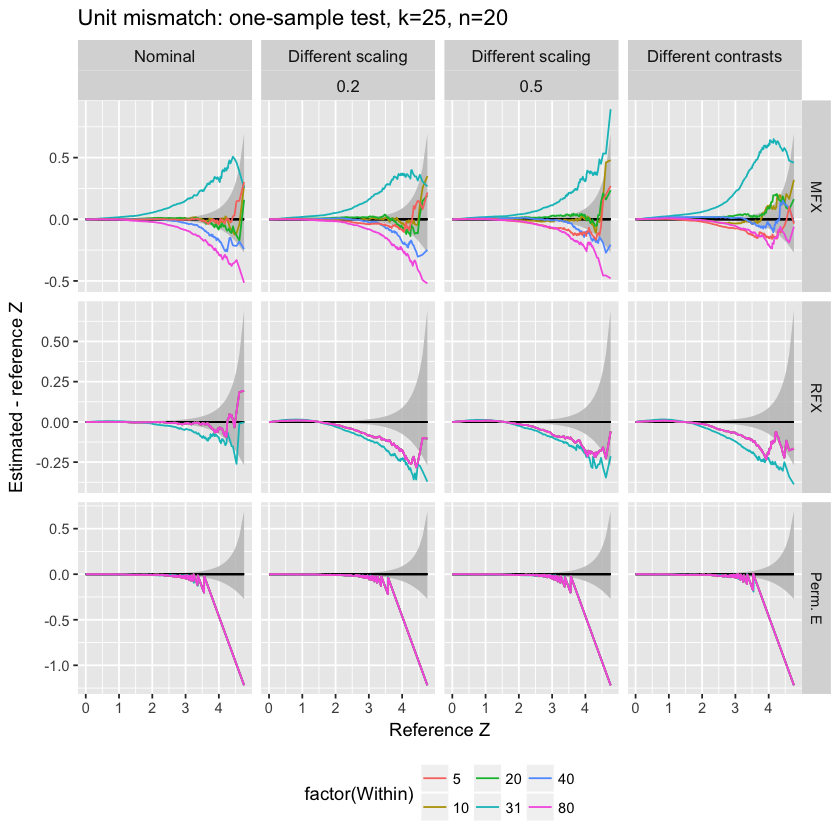

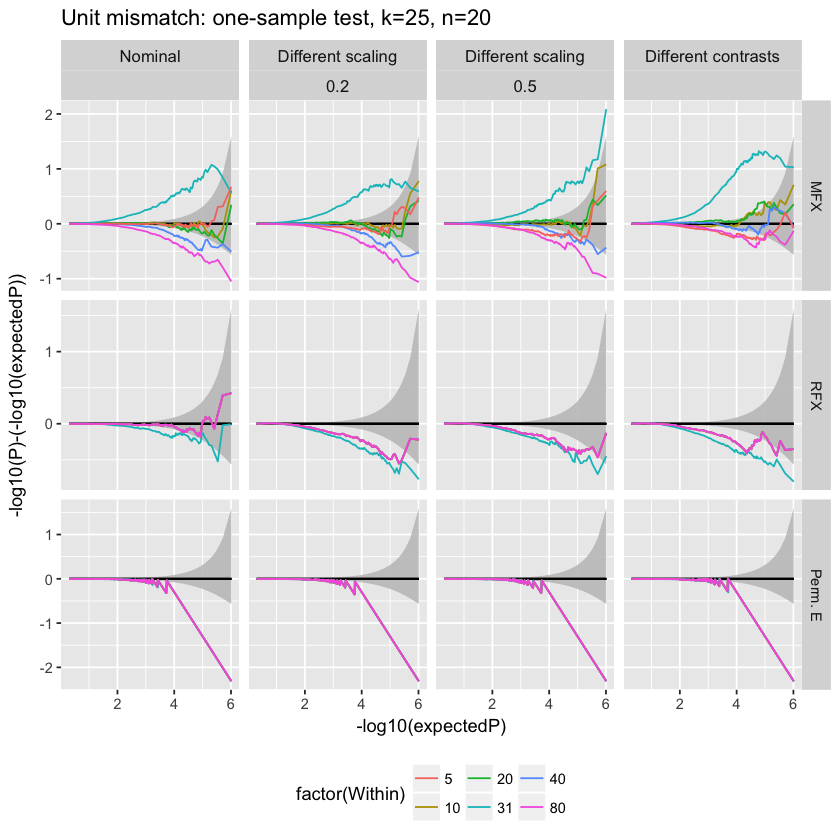

In [20]:
source('plot_lib.R')
source('prepare_data.R')
source('plot_unit_mismatch.R')
source('plot_blandaldman_z.R')
source('plot_grid_methods_color_within.R')
source('plot_qq_p.R')

con_methods <- c("megaMFX","megaRFX","permutCon", "megaFFX_FSL")
con_data_1 <- subset(allsimudat, is.finite(expectedz) & expectedz>0  &  methods %in% con_methods)

best_con_data_1 <- subset(con_data_1, 
    ((methods %in% c("megaMFX") & Between==1) | 
     (methods %in% c("megaRFX"))  | 
     (methods %in% c("megaFFX_FSL") & Between==0) |
     (methods %in% c("permutCon"))
    ) & (nStudies==25 | nStudies==100))

best_con_data_1_n20 <- subset(best_con_data_1, nSubjects==20)
best_con_data_1_n50 <- subset(best_con_data_1, nSubjects==50)
best_con_data_1_n100_k100 <- subset(best_con_data_1, nSubjects==100)


# Note for RFX we only keep btw=1 for display purposes (results with btw=0 are very similar)
# Also we only keep z>4.5 (to avoid very variable tail affecting ylim)
plot_unit_mismatch(
    subset(best_con_data_1_n20, ((methods %in% c("megaRFX") & Between==1) | !(methods %in% c("megaRFX")))), 
    'one-sample test, k=25, n=20', mult=FALSE, single=TRUE, lim=NA, max_z=18)

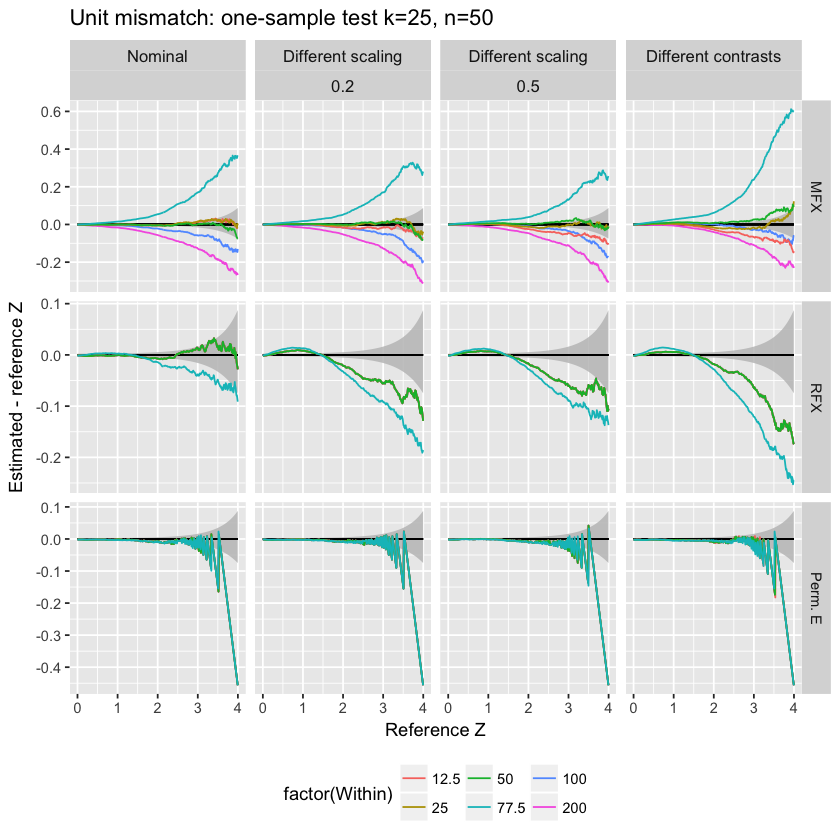

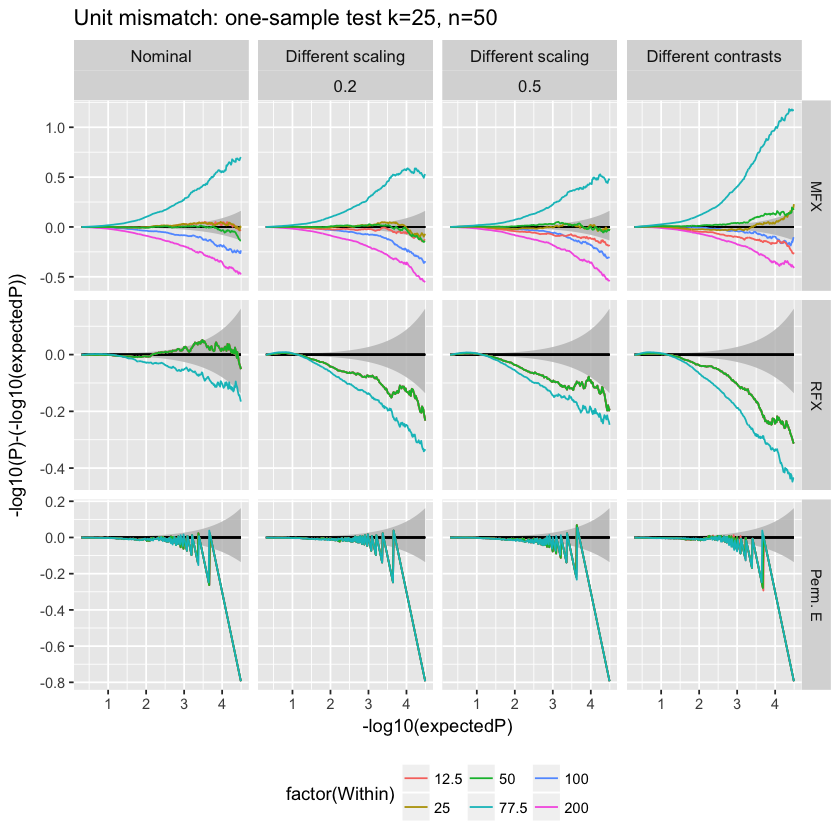

In [21]:
plot_unit_mismatch(
    subset(best_con_data_1_n50, ((methods %in% c("megaRFX") & Between==1) | !(methods %in% c("megaRFX")))), 
    'one-sample test k=25, n=50', mult=FALSE, single=TRUE, lim=NA, max_z=4)

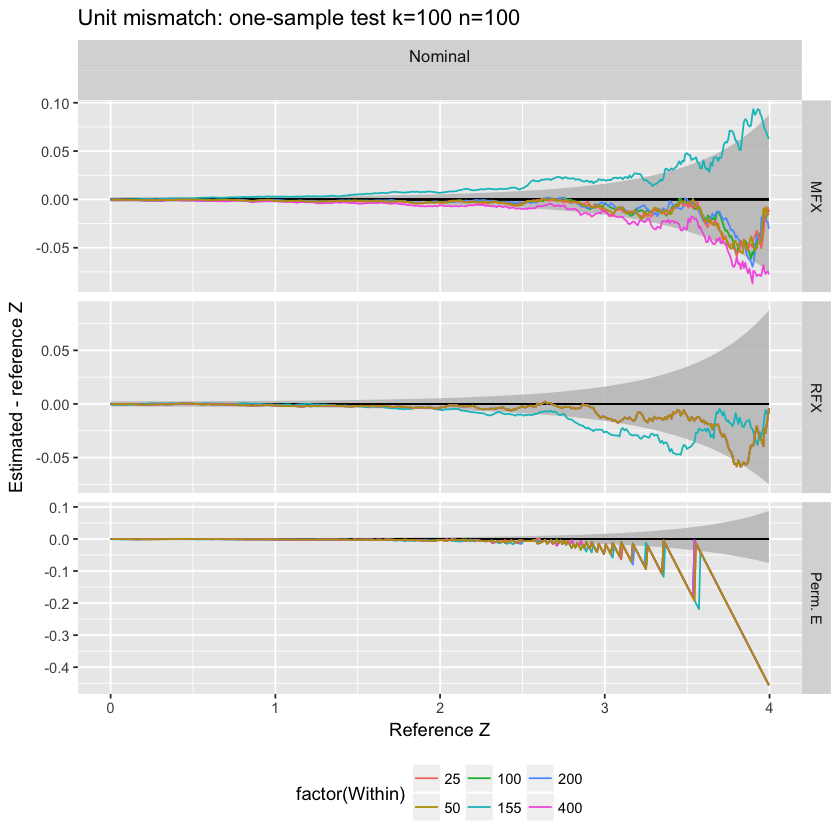

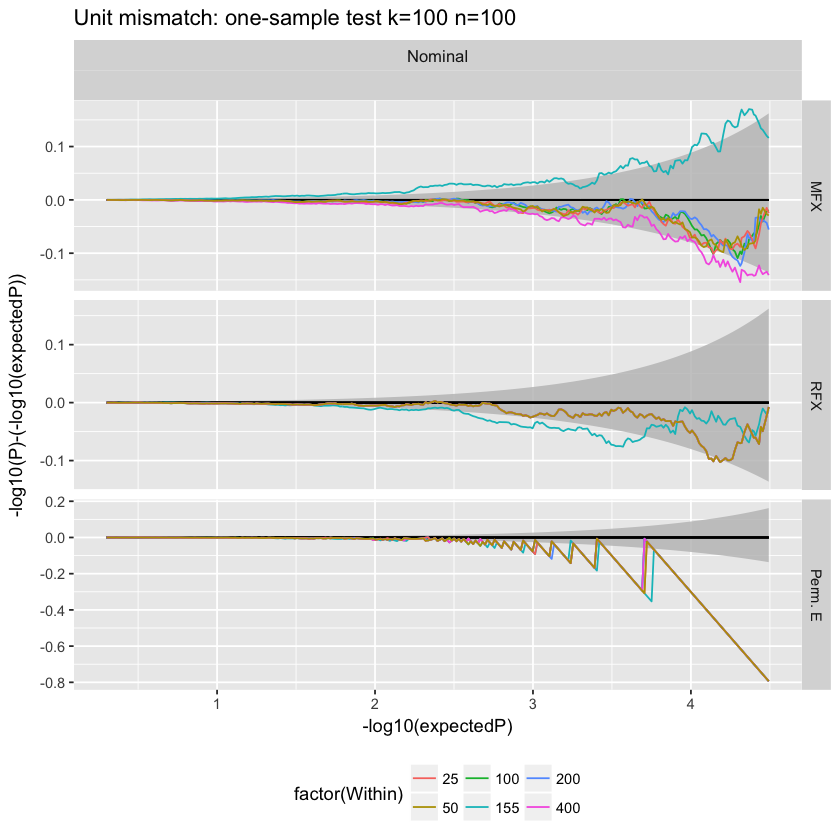

In [22]:
plot_unit_mismatch(
    subset(best_con_data_1_n100_k100, ((methods %in% c("megaRFX") & Between==1) | !(methods %in% c("megaRFX")))), 
    'one-sample test k=100 n=100', mult=FALSE, single=TRUE, lim=NA, max_z=4)

In [23]:
head(best_con_data_1_n100_k100)

,methods,glm,nStudies,nSubjects,Between,Within,nSubjectsSame,WithinSame,unitMism,soft2,⋯,rankP,expectedP,lnp,equivz,allgroups,expectedz,p_upper,z_upper,p_lower,z_lower
174401,megaRFX,1,100,100,1,155,1,0,nominal,0,⋯,1,9.746589e-07,-12.84813,4.554059,1 155 100 100 1026000 0 0 1 nominal,4.758609,2.467623e-08,5.453628,3.595393e-06,4.487962
174402,megaRFX,1,100,100,1,155,1,0,nominal,0,⋯,1,9.746589e-07,-12.84813,4.554059,1 155 100 100 1026000 0 0 1 nominal,4.758609,2.467623e-08,5.453628,3.595393e-06,4.487962
174403,megaRFX,1,100,100,1,155,1,0,nominal,0,⋯,1,9.746589e-07,-12.84813,4.554059,1 155 100 100 1026000 0 0 1 nominal,4.758609,2.467623e-08,5.453628,3.595393e-06,4.487962
174404,megaRFX,1,100,100,1,155,1,0,nominal,0,⋯,1,9.746589e-07,-12.84813,4.554059,1 155 100 100 1026000 0 0 1 nominal,4.758609,2.467623e-08,5.453628,3.595393e-06,4.487962
174405,megaRFX,1,100,100,1,155,1,0,nominal,0,⋯,1,9.746589e-07,-12.84813,4.554059,1 155 100 100 1026000 0 0 1 nominal,4.758609,2.467623e-08,5.453628,3.595393e-06,4.487962
174406,megaRFX,1,100,100,1,155,1,0,nominal,0,⋯,1,9.746589e-07,-12.84813,4.554059,1 155 100 100 1026000 0 0 1 nominal,4.758609,2.467623e-08,5.453628,3.595393e-06,4.487962


In [24]:
unique(best_con_data_1$nSubjects)

[1]  50  20 100